In [2]:
import pandas as pd
import pickle

In [8]:
with open("covid.txt", "rb") as handle : # read text file into dataframe
  covid_df = pickle.loads(handle.read())
with open("christmas.txt", "rb") as handle : # read text file into dataframe
  christmas_df = pickle.loads(handle.read())
with open("spacex.txt", "rb") as handle : # read text file into dataframe
  spacex_df = pickle.loads(handle.read())

data = pd.concat([covid_df, christmas_df, spacex_df], ignore_index=True)

In [15]:
from sklearn.model_selection import train_test_split
import random

random.seed(123)
train, test = train_test_split(data, test_size=0.2)
print("Number of labels in train:")
print(train.shape[0])
print("Number of labels in test:")
print(test.shape[0])

Number of labels in train:
24816
Number of labels in test:
6205


In [38]:
train.head(10)

,Classification,Text,Hashtag
23632,spacex,crew-1: one or more videos have been added. crew1,"[spacextimemachine, crew1]"
16687,christmas,good morning from @rabbithillpark 👋🏻 - and it’...,[]
15002,christmas,11 days until advent! fixated by @timchesterco...,"[advent, fixated]"
16476,christmas,at red butte - lucy maud montgomery navidad - ...,"[navidad, aprenderingles, ingles, english, cur..."
8254,covid,u.s. total cases and deaths sorted by: number ...,"[coronavirus, covid_19, covid2019, covidー19, c..."
25412,spacex,nasa crew-1 mission makes historic launch to t...,"[nasa, iss]"
18050,christmas,arena duos contender league - came second plac...,"[fortnite, fortnitechapter2, fortniteseason11,..."
28537,spacex,you can watch live nasa cam at this link. live...,[]
17988,christmas,i love the framed mini prints at society6 on s...,"[society6, society6art, society6artist, artwor..."
15390,christmas,love the hole idea of nanny nellie's panto tel...,[]


In [39]:
test.head(10)

,Classification,Text,Hashtag
3017,covid,districtwest ensures to do regular and enough ...,"[districtwest, covid_19, tested, nocost, sympt..."
7897,covid,naomi has been interviewed by @bbcradiolincs a...,[loneliness]
30196,spacex,enough with @realdonaldtrump or @joebiden bein...,"[election2020, spaceforce]"
273,covid,participants shared findings on virus mutation...,"[chinesetraditionalmedicine, china, uk]"
6199,covid,"remember hydrocloroquine works, but politician...",[politics]
6880,covid,my little crony - a visualization of the conne...,"[governance, corruption]"
7228,covid,@devisridhar oh that's nothing @devisridhar. e...,[]
5212,covid,@pfizer launches vaccine delivery trial in fou...,[]
5875,covid,"the ministry of labour, training and skills de...","[online, information, employmentstandards, hea..."
143,covid,"this is catchy and humorous, but is no joke. d...",[]


Naive Bayes model of product reviews using Python's scikit-learn package

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns; sns.set() 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [29]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train['Text'], train['Classification'])
labels = model.predict(test['Text'])

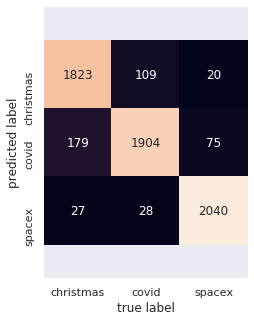

In [30]:
distinct_label = sorted(set(train['Classification'])) #since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x,y label for heatmap
mat = confusion_matrix(test['Classification'], labels)
plt.figure(figsize=(5,5))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=distinct_label, yticklabels=distinct_label)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) #since heatmap cut off numbers, we need to set larger y limit to locate number on center
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
print("Microaveraged F1 scores:")
print(f1_score(test['Classification'], labels, average='micro'))
print("Macroaveraged F1 scores:")
print(f1_score(test['Classification'], labels, average='macro'))

Microaveraged F1 scores:
0.9294117647058824
Macroaveraged F1 scores:
0.9290906290191528
